In [1]:
import warnings;
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
sns.set_palette("rainbow")
df = pd.read_csv('./data/data.csv')

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [6]:
len(df)# samples of the Iris flower

150

In [7]:
print(df.species) # future input parameters

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object


<Axes: xlabel='species', ylabel='count'>

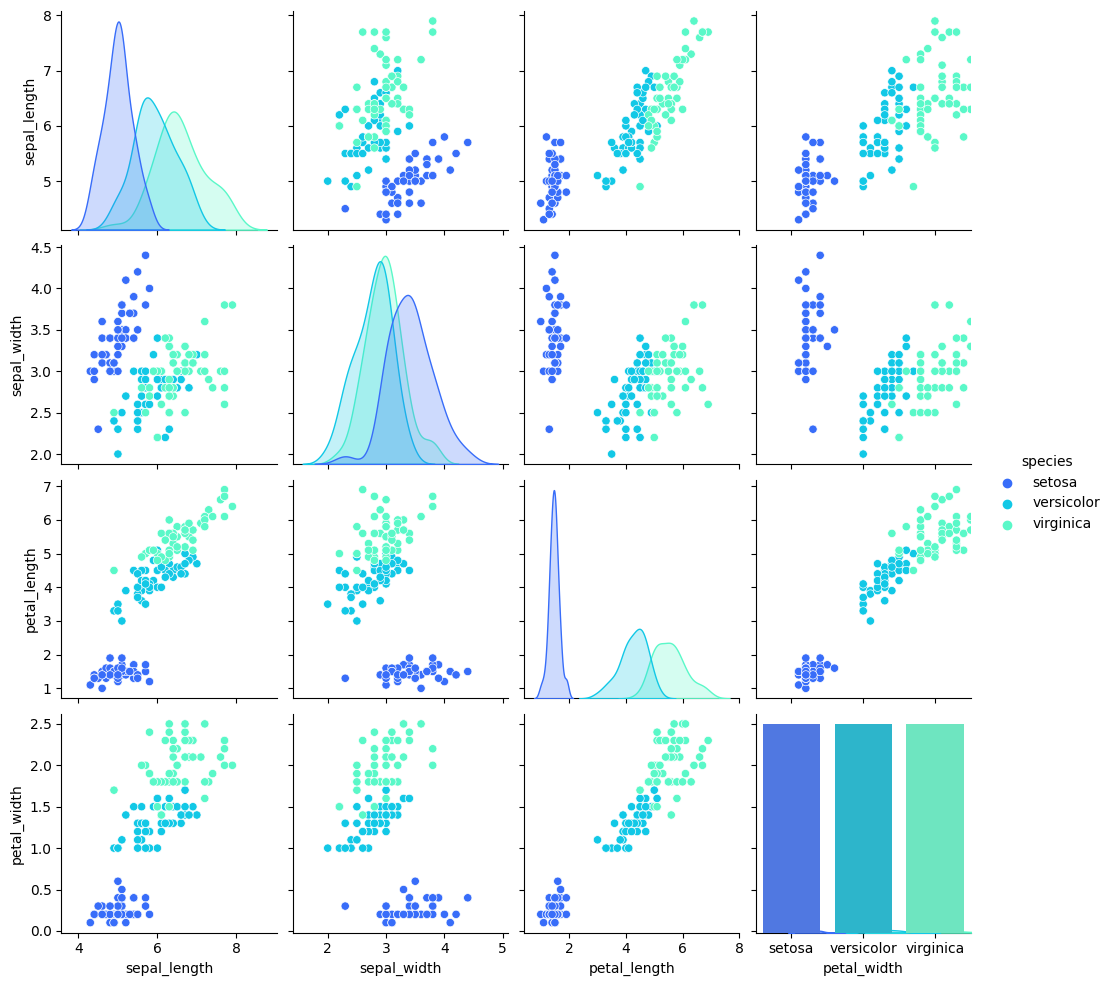

In [8]:
sns.pairplot(df,hue='species')

sns.countplot(x = 'species', data = df)

By looking the result of pair plot we sure that all dark blue points are well separated with other two classes. But Versicolor and virginica are partially overlapping with each other.

In pair plot we see that their are some feature combination which has less overlapping for Versicolor and virginica.  That means those features are very important for our classification task purpose.

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X = df.drop('species',axis=1)
y = df['species']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [12]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100)

In [13]:
clf.fit(X_train,y_train)

RandomForestClassifier()

In [14]:
y_pred=clf.predict(X_test)

In [15]:
iris_species_index = clf.predict([[1,1,1,1]])[0]
print(iris_species_index)

versicolor


In [16]:
from sklearn import metrics

In [17]:
print(list(y_test))
print(list(y_pred))

['virginica', 'versicolor', 'setosa', 'setosa', 'setosa', 'versicolor', 'setosa', 'virginica', 'setosa', 'setosa', 'virginica', 'virginica', 'versicolor', 'setosa', 'virginica', 'virginica', 'setosa', 'virginica', 'setosa', 'virginica', 'setosa', 'virginica', 'versicolor', 'versicolor', 'versicolor', 'virginica', 'setosa', 'setosa', 'virginica', 'virginica', 'setosa', 'setosa', 'versicolor', 'versicolor', 'virginica', 'virginica', 'virginica', 'setosa', 'virginica', 'setosa', 'virginica', 'setosa', 'versicolor', 'virginica', 'versicolor']
['virginica', 'versicolor', 'setosa', 'setosa', 'setosa', 'versicolor', 'setosa', 'virginica', 'setosa', 'setosa', 'virginica', 'virginica', 'versicolor', 'setosa', 'virginica', 'virginica', 'setosa', 'virginica', 'setosa', 'virginica', 'setosa', 'virginica', 'versicolor', 'virginica', 'versicolor', 'virginica', 'setosa', 'setosa', 'virginica', 'versicolor', 'setosa', 'setosa', 'versicolor', 'versicolor', 'virginica', 'virginica', 'virginica', 'setosa

In [18]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9555555555555556


In [19]:
#sklearn dataset used for feature importance determination only
from sklearn import datasets
iris = datasets.load_iris()
input_parameters = pd.Series(clf.feature_importances_,index=iris.feature_names).sort_values(ascending=False)
                          
input_parameters.index

Index(['petal length (cm)', 'petal width (cm)', 'sepal length (cm)',
       'sepal width (cm)'],
      dtype='object')

Text(0, 0.5, 'Input Parameters')

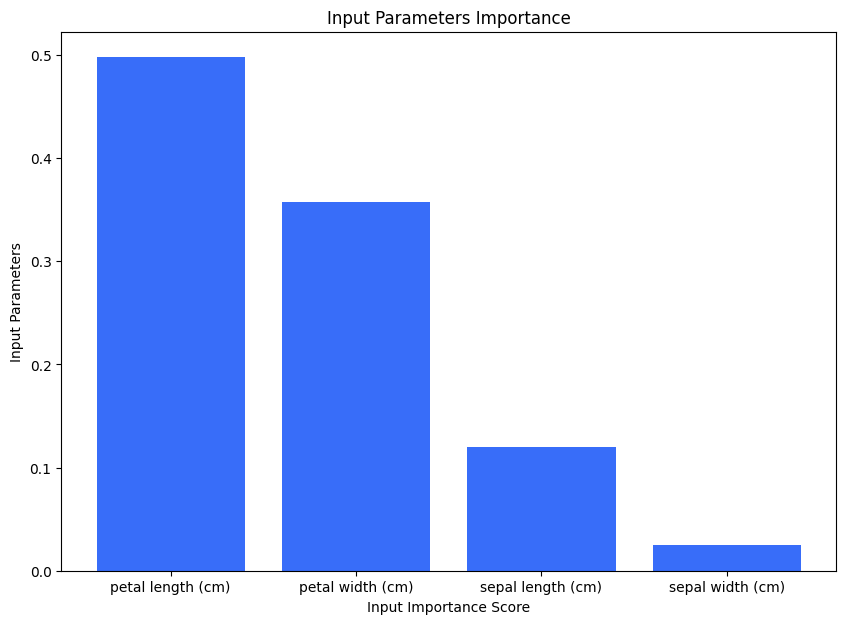

In [20]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 7]

plt.bar(input_parameters.index,input_parameters.values)
plt.title('Input Parameters Importance')
plt.xlabel('Input Importance Score')
plt.ylabel('Input Parameters')

In decision trees, features represent the variables or attributes that the tree uses to make predictions. Some key points:
- Features are the input data columns that the decision tree analyzes to derive rules and make splits. They can be categorical or continuous.
- At each node in the tree, the algorithm selects the feature that best splits the data into distinct target classes. This forms the branching rules.
- Features that result in nodes near the top of the tree contribute to predictions earlier and have higher importance.
- Feature importance refers to techniques that calculate how useful or valuable each feature is in constructing the decision tree model.
- Importance is determined by metrics like Gini impurity, information gain, decrease in variance for regression trees.
- Features used higher up in a decision tree to make key early splits have higher importance.
- The most important features help the decision tree model predict the target variable more accurately.
- Feature importance helps in feature selection, removes irrelevant features, and provides interpretability into which features drive the decision process.

In [23]:
from sklearn import metrics
from sklearn import tree
from sklearn import ensemble
from sklearn.metrics import roc_auc_score

clf = dict()
clf['Decision Tree'] = tree.DecisionTreeClassifier(criterion='entropy', splitter='best').fit(X_train,y_train)
#clf['Gradient Boosting'] = ensemble.GradientBoostingClassifier(n_estimators=10).fit(X_train,y_train)
clf['Random Forest'] = ensemble.RandomForestClassifier(n_estimators=10).fit(X_train,y_train)
#clf['Bagging'] =  ensemble.BaggingClassifier(n_estimators=10).fit(X_train,y_train)
#clf['AdaBoost'] =  ensemble.AdaBoostClassifier(n_estimators=10).fit(X_train,y_train)

fig = plt.figure(figsize=[10,10])

print('AUROC\tModel')
for i, curr_mdl in enumerate(clf):    
    yhat = clf[curr_mdl].predict_proba(X_test.values)[:,1]
    score = roc_auc_score(y_test, clf[curr_mdl].predict_proba(X_test), multi_class='ovr')
    print('{:0.3f}\t{}'.format(score, curr_mdl))
   

AUROC	Model
0.940	Decision Tree
0.971	Random Forest


<Figure size 1000x1000 with 0 Axes>

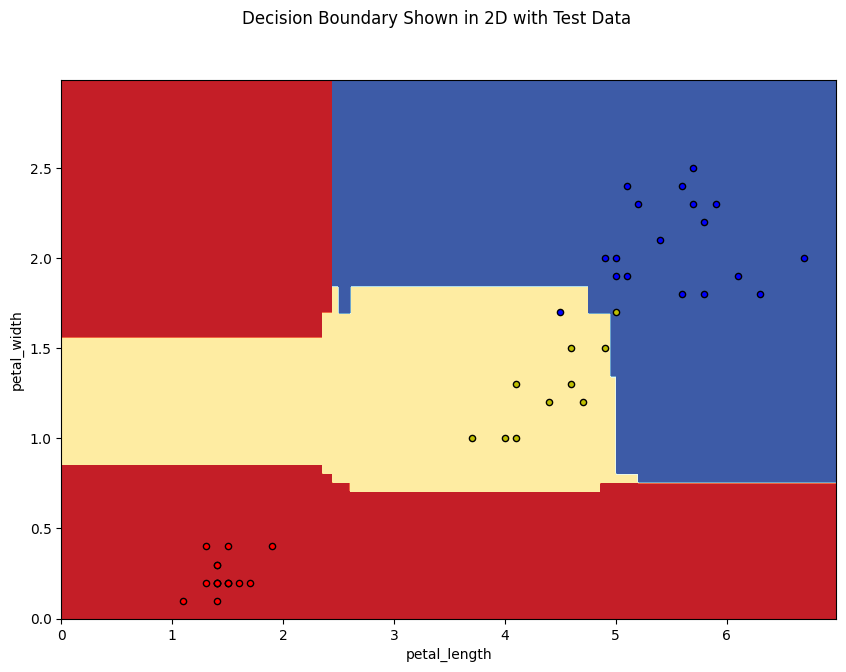

In [26]:
# plot decision boundary for pedal width vs pedal length
cn = ['setosa', 'versicolor', 'virginica']
plot_step = 0.01
plot_colors = "ryb"
xx, yy = np.meshgrid(np.arange(0, 7, plot_step), np.arange(0, 3, plot_step))
plt.tight_layout(h_pad=1, w_pad=1, pad=2.5)

selected_predictors = ["petal_length", "petal_width"]
#selected_predictors = ["sepal_length", "sepal_width"]
mod_dt_1 = RandomForestClassifier(max_depth = 3, random_state = 1)
y_train_en = y_train.replace({'setosa':0,'versicolor':1,'virginica':2}).copy()
mod_dt_1.fit(X_train[selected_predictors],y_train_en)

pred_all = mod_dt_1.predict(np.c_[xx.ravel(), yy.ravel()])
pred_all = pred_all.reshape(xx.shape)

graph = plt.contourf(xx, yy, pred_all, cmap=plt.cm.RdYlBu)

plt.xlabel(selected_predictors[0])
plt.ylabel(selected_predictors[1])

# plot test data points
n_class = 3
for i, color in zip(cn, plot_colors):
    temp = np.where(y_test == i)
    idx = [elem for elems in temp for elem in elems]
    plt.scatter(X_test.iloc[idx, 2], X_test.iloc[idx, 3], c=color, 
                label=y_test, cmap=plt.cm.RdYlBu, edgecolor='black', s=20)

plt.suptitle("Decision Boundary Shown in 2D with Test Data")
plt.axis("tight");

Examining decision boundaries is a great way to learn how the training data we select affects performance and the ability for our model to generalize. Visualization of decision boundaries can illustrate how sensitive models are to each dataset, which is a great way to understand how specific algorithms work, and their limitations for specific datasets.